In [1]:
import sys, os, importlib
from IPython.display import Image

In [2]:
sys.path.append(os.path.abspath('../'))

In [3]:
from wmhpypes.interfaces import ibbmTum
from wmhpypes.workflows import ibbmTum_wf

In [4]:
from nipype.pipeline.engine import Workflow, Node
from nipype import DataGrabber, DataSink, IdentityInterface, MapNode, JoinNode
from nipype.interfaces.io import BIDSDataGrabber, DataFinder

In [5]:
test_data_dir = os.path.abspath('../test_data')
weights_dir = os.path.join(test_data_dir, 'model_FLAIR_only')
out_dir = os.path.join(test_data_dir, 'results_FLAIR_only')
wf_work_dir = os.path.join(test_data_dir, 'wf_work_dir')

cores = 50

In [6]:
os.chdir(test_data_dir)

In [7]:
subs_list = ['sub-test']
template = {'flair': [['sub-id', 'sub-id', 'FLAIR.nii.gz']]}

In [8]:
weights_source = Node(interface=IdentityInterface(fields=['weights']), name='weights_source')
weights_source.inputs.weights = [os.path.abspath(os.path.join(weights_dir, i)) for i in os.listdir(weights_dir)]

In [9]:
data_source = Node(IdentityInterface(fields=['weights', 'sub-id']), name='data_source')
data_source.inputs.weights = [os.path.join(weights_dir, i) for i in os.listdir(weights_dir)]
data_source.iterables = ('sub-id', subs_list)

In [10]:
data_grabber = Node(
    interface=DataGrabber(infields=['sub-id'],
                          outfields=['flair']),
    name='data_grabber')
data_grabber.inputs.base_directory = test_data_dir
data_grabber.inputs.template = '%s/%s_%s'
data_grabber.inputs.template_args = template
data_grabber.inputs.sort_filelist = True

In [11]:
sink = Node(interface=DataSink(), name = 'sink')
sink.inputs.base_directory = out_dir

In [12]:
test_wf = ibbmTum_wf.get_test_wf()

In [13]:
# Connect to Workflow

In [14]:
wmh = Workflow(name='wmh', base_dir=wf_work_dir)

In [15]:
wmh.connect(data_source, 'sub-id', data_grabber, 'sub-id')
wmh.connect(data_source, 'weights', test_wf, 'inputspec.weights')
wmh.connect(data_grabber, 'flair', test_wf, 'inputspec.flair')
wmh.connect(test_wf, 'outputspec.prediction_nifti', sink, '@pred')

210716-18:41:44,726 nipype.workflow INFO:
	 Generated workflow graph: /media/orco/home_data/Dokumente/DZNE/WMHpypes/test_data/wf_work_dir/wmh/graph.png (graph2use=colored, simple_form=True).


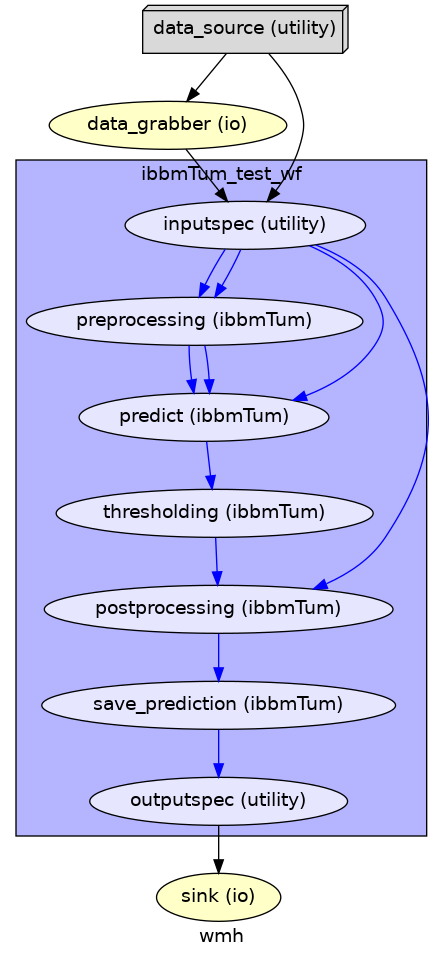

In [16]:
wmh.write_graph(graph2use='colored')
Image('./wf_work_dir/wmh/graph.png', width=200)

In [19]:
#wmh.run() #Single thread

plugin_args = {'n_procs': cores}
wmh.run(plugin='MultiProc', plugin_args=plugin_args)

210716-18:42:33,685 nipype.workflow INFO:
	 Workflow wmh settings: ['check', 'execution', 'logging', 'monitoring']
210716-18:42:33,696 nipype.workflow INFO:
	 Running in parallel.
210716-18:42:33,700 nipype.workflow INFO:
	 [MultiProc] Running 0 tasks, and 1 jobs ready. Free memory (GB): 28.20/28.20, Free processors: 50/50.
210716-18:42:33,799 nipype.workflow INFO:
	 [Node] Setting-up "wmh.data_grabber" in "/media/orco/home_data/Dokumente/DZNE/WMHpypes/test_data/wf_work_dir/wmh/_sub-id_sub-test/data_grabber".
210716-18:42:33,814 nipype.workflow INFO:
	 [Node] Running "data_grabber" ("nipype.interfaces.io.DataGrabber")
210716-18:42:33,821 nipype.workflow INFO:
	 [Node] Finished "wmh.data_grabber".
210716-18:42:35,701 nipype.workflow INFO:
	 [Job 0] Completed (wmh.data_grabber).
210716-18:42:35,704 nipype.workflow INFO:
	 [MultiProc] Running 0 tasks, and 1 jobs ready. Free memory (GB): 28.20/28.20, Free processors: 50/50.
210716-18:42:35,785 nipype.workflow INFO:
	 [Job 1] Cached (wmh.ib